In [234]:
import pandas as pd
import numpy as np


In [235]:
data = pd.read_csv('../datasets/hepatitis_csv.csv')

In [236]:
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [237]:
data.isna().sum()
    

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [238]:
threshold = 0.3
data = data[data.columns[data.isnull().mean()<threshold]]
data = data.loc[data.isnull().mean(axis=1) < threshold]
for i in data.columns:
    data[i].fillna(data[i].value_counts().idxmax(), inplace=True)

In [239]:
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,False,live
3,31,female,True,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,85.0,200.0,4.0,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,85.0,242.0,3.3,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,True,live


In [240]:
data['sex'] = (data['sex']=='female').astype(int)

In [241]:
data['class'] = (data['class'] == 'live').astype(int)

In [242]:
encoding = []
for i,j in enumerate(data.dtypes):
    if j in['object', 'bool']:
        encoding.append(data.columns[i])

In [243]:
data = pd.get_dummies(data, columns = encoding)

In [281]:
# x = data.drop('class', axis = 1)
x = data['age']

In [282]:
y = data['class']

In [292]:
x

array([30, 50, 78, 31, 34, 34, 51, 23, 39, 30, 39, 32, 41, 30, 47, 38, 66,
       40, 38, 38, 22, 27, 31, 42, 25, 27, 49, 58, 61, 51, 39, 62, 41, 26,
       35, 37, 23, 20, 42, 65, 52, 33, 56, 34, 28, 37, 28, 36, 38, 39, 39,
       44, 40, 30, 37, 30, 64, 45, 37, 32, 32, 36, 49, 27, 56, 57, 39, 44,
       24, 34, 36, 50, 32, 58, 34, 34, 28, 23, 36, 30, 67, 62, 28, 44, 30,
       38, 38, 50, 42, 33, 52, 59, 40, 30, 44, 47, 60, 48, 22, 27, 51, 47,
       25, 35, 45, 54, 33,  7, 42, 52, 45, 36, 69, 24, 50, 54, 56, 20, 42,
       37, 50, 34, 28, 50, 54, 57, 54, 31, 48, 72, 38, 25, 51, 38, 47, 45,
       36, 54, 51, 49, 45, 31, 41, 20, 36, 46, 44, 61, 53, 43])

In [283]:
dataArray = np.array(data)

In [293]:
from sklearn.model_selection import train_test_split
# x = dataArray[:,:-1]
# y = dataArray[:,-1]
x = np.array(x).reshape(-1,1)
y= np.array(y)
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state =0)

In [294]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(xtrain, ytrain)


In [295]:
print(lr.score(xtrain, ytrain))

0.021295153046084314


In [296]:
ytest

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1])

In [301]:
yPred = lr.predict(xtest)

In [302]:
yPred

array([0.73176879, 0.73681523, 0.85288347, 0.94876592, 0.8680228 ,
       0.72672234, 0.7216759 , 0.79232613, 0.84279058, 0.73176879,
       0.74690812, 0.76204746, 0.69139723, 0.79737257, 0.84783702,
       0.88316213, 0.80241902, 0.7216759 , 0.79737257, 0.65102567,
       0.81251191, 0.78727968, 0.85792991, 0.78727968, 0.71158301,
       0.82765124, 0.84279058, 0.74186168, 0.83269769, 0.73681523])

In [307]:
print("coeffiecients:")
print(lr.coef_)
print("Bias:")
print(lr.intercept_)

coeffiecients:
[-0.00504644]
Bias:
0.9840910303205797


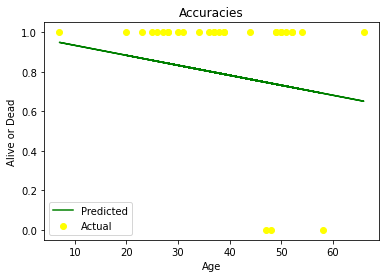

In [322]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots()
axes.plot(xtest, yPred, color = 'green')
axes.scatter(xtest, ytest, color = 'yellow')
axes.set_title("Accuracies")
axes.set_xlabel("Age")
axes.set_ylabel("Alive or Dead")
axes.legend(['Predicted', 'Actual'])
plt.show()

In [306]:
import math
MSE = np.square(np.subtract(ytest,yPred)).mean()   
   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:\n")  
print(rsme)  

Root Mean Square Error:

0.3085244334155428
